In [ ]:
"""
Non-negative Matrix Factorization (NNMF) and Image Segmentation:

NMF is an unsupervised learning method that decomposes a non-negative data matrix (such as an image) into two non-negative factors, W and H, such that X ≈ W * H&#8203;:contentReference[oaicite:0]{index=0}. 
For images, X is the pixel intensity matrix of the image. The factors W and H capture additive “parts” of the image: each column of W can be seen as a basis feature (a part of the image) and each column of H provides coefficients (weights) to combine these features to approximately reconstruct the original image&#8203;:contentReference[oaicite:1]{index=1}.
This parts-based representation arises because of the non-negativity constraint, leading NMF to learn intuitive, localized image features&#8203;:contentReference[oaicite:2]{index=2}. 
These learned parts can correspond to meaningful segments in the image. In fact, NMF has been used to segment images by grouping pixels according to the dominant component in W/H&#8203;:contentReference[oaicite:3]{index=3}&#8203;:contentReference[oaicite:4]{index=4}.
"""

# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import data

# Load the "camera" test image (grayscale) from skimage
# The image is a 2D array of pixel intensities (shape: 512x512).
camera = data.camera().astype(float) / 255.0  # normalize pixel values to [0, 1] range

# Step 2: Apply Non-negative Matrix Factorization (NMF)
# We treat the image array as a matrix X of shape (n_rows, n_cols).
# Choose the number of components (segments) k for the factorization.
k = 4
# Initialize the NMF model. We set a random state for reproducibility.
model = NMF(n_components=k, init='random', random_state=0, max_iter=500)
# Fit the model to the image data. fit_transform returns the matrix W (shape: n_rows x k).
W = model.fit_transform(camera)
# The components_ attribute of the fitted model is H (shape: k x n_cols).
H = model.components_
# After this, W and H are both non-negative:
#   - W (shape: n_rows x k): each column is a basis (feature) representing a vertical pattern (part) of the image.
#   - H (shape: k x n_cols): each row gives the weights (coefficients) for how each part is combined along the image columns&#8203;:contentReference[oaicite:5]{index=5}.

# Step 3: Create segmentation from NMF components
# We compute the contribution of each component to each pixel by outer product:
# For each component i, the contribution matrix C_i = W[:, i] (as a column) * H[i, :] (as a row).
# Then assign each pixel to the component with the highest contribution (dominant part).
components = np.zeros((camera.shape[0], camera.shape[1], k))
for i in range(k):
    # Outer product of the i-th column of W and i-th row of H gives a matrix for component i.
    components[:, :, i] = np.outer(W[:, i], H[i, :])
# For each pixel, find which component contributes the most (index of max along the components axis).
segmentation_map = np.argmax(components, axis=2)

# Step 4: Visualize the original image and the segmentation result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(camera, cmap='gray')
plt.title("Original Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

# Segmentation map (showing the component index of each pixel)
plt.subplot(1, 2, 2)
im = plt.imshow(segmentation_map, cmap='tab10', vmin=0, vmax=k-1)
plt.title(f"NMF Segmentation (k={k})")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
# Add a colorbar to indicate which color corresponds to which component index
cbar = plt.colorbar(im, ticks=np.arange(k))
cbar.set_label("Component Index")
plt.tight_layout()
plt.show()

# Explanation:
# - W and H matrices: After NMF, W contains basis features (parts) and H contains how to weight them.
# - Each pixel's value is approximated by a sum of components (outer products of W[:,i] and H[i,:]), 
#   and we label each pixel by the largest contributor (argmax).
# - This yields a segmentation where each pixel is assigned to the most relevant NMF component.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


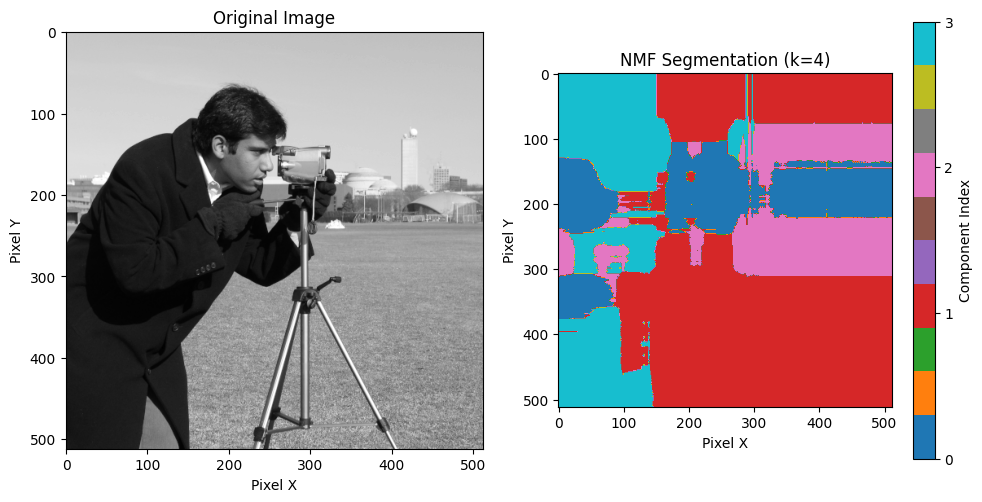

In [1]:


# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import data

# Load the "camera" test image (grayscale) from skimage
# The image is a 2D array of pixel intensities (shape: 512x512).
camera = data.camera().astype(float) / 255.0  # normalize pixel values to [0, 1] range

# Step 2: Apply Non-negative Matrix Factorization (NMF)
# We treat the image array as a matrix X of shape (n_rows, n_cols).
# Choose the number of components (segments) k for the factorization.
k = 4
# Initialize the NMF model. We set a random state for reproducibility.
model = NMF(n_components=k, init='random', random_state=0, max_iter=500)
# Fit the model to the image data. fit_transform returns the matrix W (shape: n_rows x k).
W = model.fit_transform(camera)
# The components_ attribute of the fitted model is H (shape: k x n_cols).
H = model.components_
# After this, W and H are both non-negative:
#   - W (shape: n_rows x k): each column is a basis (feature) representing a vertical pattern (part) of the image.
#   - H (shape: k x n_cols): each row gives the weights (coefficients) for how each part is combined along the image columns&#8203;:contentReference[oaicite:5]{index=5}.

# Step 3: Create segmentation from NMF components
# We compute the contribution of each component to each pixel by outer product:
# For each component i, the contribution matrix C_i = W[:, i] (as a column) * H[i, :] (as a row).
# Then assign each pixel to the component with the highest contribution (dominant part).
components = np.zeros((camera.shape[0], camera.shape[1], k))
for i in range(k):
    # Outer product of the i-th column of W and i-th row of H gives a matrix for component i.
    components[:, :, i] = np.outer(W[:, i], H[i, :])
# For each pixel, find which component contributes the most (index of max along the components axis).
segmentation_map = np.argmax(components, axis=2)

# Step 4: Visualize the original image and the segmentation result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(camera, cmap='gray')
plt.title("Original Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

# Segmentation map (showing the component index of each pixel)
plt.subplot(1, 2, 2)
im = plt.imshow(segmentation_map, cmap='tab10', vmin=0, vmax=k-1)
plt.title(f"NMF Segmentation (k={k})")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
# Add a colorbar to indicate which color corresponds to which component index
cbar = plt.colorbar(im, ticks=np.arange(k))
cbar.set_label("Component Index")
plt.tight_layout()
plt.show()
python 
# Explanation:
# - W and H matrices: After NMF, W contains basis features (parts) and H contains how to weight them.
# - Each pixel's value is approximated by a sum of components (outer products of W[:,i] and H[i,:]), 
#   and we label each pixel by the largest contributor (argmax).
# - This yields a segmentation where each pixel is assigned to the most relevant NMF component.


In [19]:

import matplotlib.pyplot as plt 
import pandas as pd 
df=pd.read_csv('multiplicative_update_results.csv')
df


rank  percentage      time  compression_ratio    mse_mu  \
0     5           1  0.467115           0.019531  0.241931   
1    25           5  0.723167           0.097656  0.268073   
2    51          10  1.061694           0.199219  0.269051   
3   102          20  1.545404           0.398438  0.269305   
4   153          30  1.845758           0.597656  0.269305   
5   256          50  5.068320           1.000000  0.269305   
6   358          70  4.037871           1.398438  0.269305   
7   435          85  5.831287           1.699219  0.269305   
8   460          90  6.672398           1.796875  0.269305   
9   512         100  6.203381           2.000000  0.269305   

                            saved_image  
0    results/compressed_mu_1percent.jpg  
1    results/compressed_mu_5percent.jpg  
2   results/compressed_mu_10percent.jpg  
3   results/compressed_mu_20percent.jpg  
4   results/compressed_mu_30percent.jpg  
5   results/compressed_mu_50percent.jpg  
6   results/compressed_mu_70percent.jpg  
7   results/compressed_mu_85percent.jpg  
8   results/compressed_mu_90percent.jpg  
9  results/compressed_mu_100percent.jpg

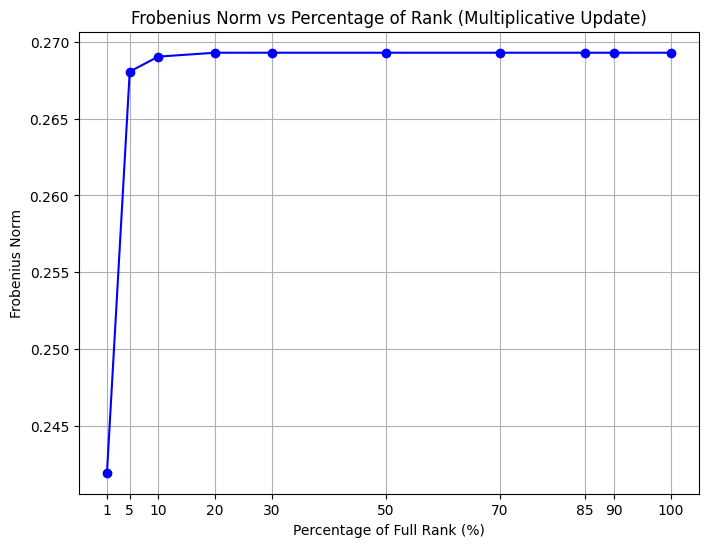

In [20]:
perc=df['percentage'].to_list()
fro_norms=df['mse_mu'].to_list()
plt.figure(figsize=(8, 6))
plt.plot(perc, fro_norms, marker='o', linestyle='-', color='blue')
plt.title('Frobenius Norm vs Percentage of Rank (Multiplicative Update)')
plt.xlabel('Percentage of Full Rank (%)')
plt.ylabel('Frobenius Norm')
plt.grid(True)
plt.xticks(perc)
plt.show()


In [28]:
import cv2 
import numpy as np 
import time

from nnmf import multiplicative_update, als
import matplotlib.pyplot as plt 
image = cv2.imread('mandrill_image.png') # Read color image (BGR format)00
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) /255 # Convert to grayscale

cv2.imshow('Grayscale Image', gray_image)


In [29]:
W,H=multiplicative_update(gray_image,2, 200)
print(W)
print(H)

[0] Reconstruction error: 98.192109
[100] Reconstruction error: 76.904115
[[0.41313603 0.73951804]
 [0.40508156 0.71476042]
 [0.36929216 0.73601542]
 ...
 [0.85909137 0.43345087]
 [0.85755831 0.42579595]
 [0.03319627 0.0663684 ]]
[[0.50916302 0.50682017 0.49154546 ... 0.26739524 0.26510484 0.26496272]
 [0.51063424 0.50713827 0.52908775 ... 0.56933402 0.57805838 0.58740511]]


In [30]:
np.max(W@H)

0.9494338497798614

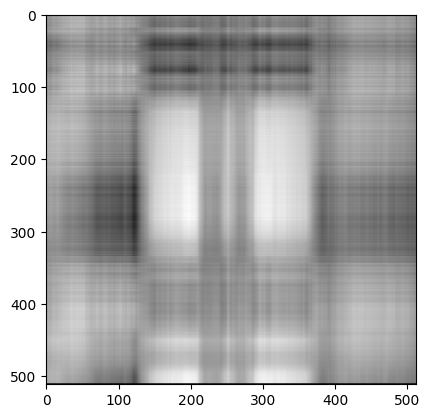

In [31]:
plt.imshow(W@H, cmap='gray')

(512, 512)
[[0.57254902 0.22352941 0.18431373 ... 0.44313725 0.59215686 0.69411765]
 [0.45098039 0.39215686 0.16862745 ... 0.49803922 0.58823529 0.49411765]
 [0.30588235 0.45098039 0.17254902 ... 0.39215686 0.34509804 0.31372549]
 ...
 [0.54901961 0.56862745 0.56078431 ... 0.33333333 0.34509804 0.30196078]
 [0.62352941 0.55294118 0.49411765 ... 0.31372549 0.30980392 0.2745098 ]
 [0.03921569 0.04313725 0.05490196 ... 0.02352941 0.02352941 0.00784314]]
This is the full rank: 512
512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 5
This is the random matrix generated for W
(512, 5)


This is the random matrix generated for H
(5, 512)
1
[[1.81854099 1.54522658 1.25980202 ... 2.03178445 1.3557574  1.45260922]
 [1.98574467 1.23031528 1.71613667 ... 1.83901369 1.32865209 1.50123444]
 [1.75012491 1.074274   0.98870576 ... 1.73231202 1.15479641 1.33136356]
 ...
 [1.39156261 0.98391492 0.98960822 ... 1.23496101 0.87947863 1.17916576]
 [2.39679399 1.60939269 1.67281189 ... 

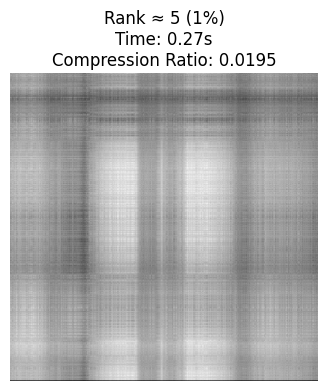

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 25
This is the random matrix generated for W
(512, 25)


This is the random matrix generated for H
(25, 512)
1
[[5.6792999  4.72847474 3.93683775 ... 6.31415614 4.5114653  4.19305498]
 [8.58229435 6.74086081 5.86752131 ... 8.94062303 6.24997142 6.77972613]
 [7.76419405 6.42680192 5.15378436 ... 7.49190049 5.55069881 5.83667704]
 ...
 [7.89367981 7.33765218 5.33030284 ... 9.26148816 7.04459719 6.90409192]
 [6.30542293 5.91374198 5.16225067 ... 7.79752769 5.59460717 6.57162566]
 [6.26587843 6.45544514 5.41723127 ... 7.5839054  5.99855767 6.74409953]]
[[1240.93602133 1153.54201911 1243.53907928 ... 1263.32662503
  1215.103231   1201.78354044]
 [1844.36882306 1745.50182159 1859.17893757 ... 1859.29751
  1862.93851222 1812.41958644]
 [1604.05314001 1546.4780611  1623.77113136 ... 1624.5454007
  1635.72993978 1566.56229821]
 ...
 [1880.47492511 1785.8670403  1896.92553491 ... 1909.85954866
  1882.36694223 1857.68337236

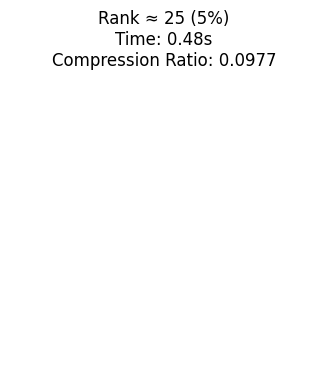

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 51
This is the random matrix generated for W
(512, 51)


This is the random matrix generated for H
(51, 512)
1
[[10.61386235  9.41478603 13.82524608 ... 11.65834991 11.66438198
  11.94878439]
 [11.44463906 11.92941298 15.32625839 ... 13.35191719 12.74978464
  14.07823254]
 [12.72040205 13.91526356 15.37917242 ... 14.03498691 14.74601071
  15.07196386]
 ...
 [11.15233898 11.844046   14.1637152  ... 11.20315735 12.62343932
  12.42684226]
 [12.42201558 13.17324015 15.52104058 ... 14.40933791 14.4405459
  14.40596342]
 [12.11900147 12.86077251 15.25304518 ... 14.57943375 14.12635637
  14.85087667]]
[[2736.76669039 2646.61414417 2756.88138804 ... 2691.91205971
  2649.5038813  2527.80121506]
 [3220.33070159 3137.0068836  3255.02481431 ... 3197.22979979
  3121.34146875 2998.95270782]
 [3428.45176189 3307.71955289 3452.90578475 ... 3386.89104557
  3345.3355883  3187.43992285]
 ...
 [3039.13995636 2918.44544137 3068.70646

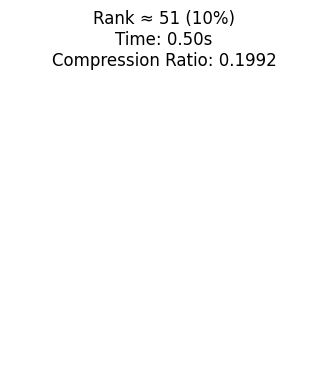

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 102
This is the random matrix generated for W
(512, 102)


This is the random matrix generated for H
(102, 512)
1
[[21.99246081 23.79847252 23.71880165 ... 26.12999684 25.69548096
  24.32139266]
 [25.89056331 26.18979814 24.8262174  ... 28.23715841 27.94013995
  26.90316148]
 [25.69535032 26.08502879 25.09013077 ... 27.6822891  28.19902169
  26.63021796]
 ...
 [25.60207394 25.30862094 25.23154735 ... 26.1556127  28.52355011
  26.77003948]
 [22.47134862 23.07409537 22.31731567 ... 23.63832386 24.30595606
  24.80079118]
 [24.21128631 24.6322476  22.95874433 ... 25.64882604 26.81903035
  26.86434923]]
[[6641.67829753 6142.32485579 6381.05035343 ... 6498.88440665
  6215.64132786 6401.88634545]
 [7228.53523125 6705.55099662 6966.04755034 ... 7099.09340777
  6743.04435239 6976.7027452 ]
 [7335.87827171 6817.10963683 7090.0671845  ... 7217.4837404
  6851.6788077  7074.40200486]
 ...
 [6902.80349653 6395.7027323  6681.78

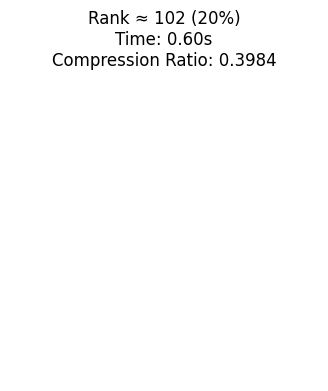

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 153
This is the random matrix generated for W
(512, 153)


This is the random matrix generated for H
(153, 512)
1
[[38.58275039 42.0146551  37.38068023 ... 35.64316744 44.7754476
  42.49075087]
 [37.48532817 38.48601067 36.77396075 ... 35.05047365 40.28288111
  40.23689465]
 [39.63054976 43.51604313 40.13879383 ... 37.08095266 42.86001697
  42.43723885]
 ...
 [38.28331452 41.22297345 37.77057308 ... 36.62761123 41.15056505
  42.56627802]
 [37.97960415 39.61498855 36.33355927 ... 35.50394729 43.44765121
  41.09849969]
 [38.11985073 40.80312366 39.04995803 ... 36.23994486 40.91602605
  41.58728624]]
[[10350.61895187  9884.30163652 10401.27176498 ... 10105.26380981
  10243.22107572 10071.69827238]
 [ 9727.29656707  9268.4837335   9754.6145882  ...  9490.81425993
   9597.66561713  9437.52056672]
 [10596.04430034 10137.87089513 10641.79030333 ... 10368.40529201
  10435.0375481  10276.90434098]
 ...
 [10211.9910831   9

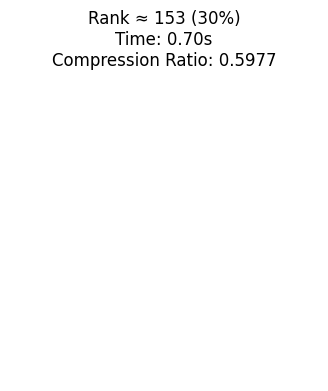

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 256
This is the random matrix generated for W
(512, 256)


This is the random matrix generated for H
(256, 512)
1
[[67.20976189 67.02284476 66.32729385 ... 67.66028183 68.51339011
  68.64814139]
 [62.93047188 59.22561897 57.32865435 ... 61.32305087 61.59797677
  58.71611092]
 [66.75711702 62.26450306 63.12640388 ... 66.30654273 64.47287553
  61.24932486]
 ...
 [65.32593249 63.0387233  64.88927423 ... 66.69441554 65.57980593
  64.30868157]
 [64.69675185 60.80290018 63.61584127 ... 63.21010558 64.36693368
  62.00561188]
 [60.27873533 60.60535115 61.67553282 ... 66.12746848 64.59308915
  64.40472202]]
[[16845.05462144 17024.50599011 15878.67742028 ... 17402.30172873
  16870.76769732 16386.11966209]
 [15063.01149968 15165.12437894 14196.78866821 ... 15550.81020675
  15057.35245638 14627.44772786]
 [16116.18720239 16269.71597148 15240.92743481 ... 16691.60241144
  16155.40007908 15701.94019876]
 ...
 [16249.21448611 1

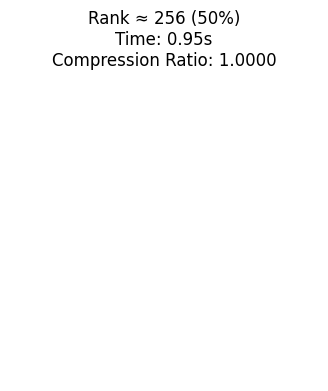

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 358
This is the random matrix generated for W
(512, 358)


This is the random matrix generated for H
(358, 512)
1
[[92.82696391 86.25714882 90.45397938 ... 95.81957902 93.77469805
  90.66355242]
 [95.1132937  86.10308151 91.28474409 ... 92.89238419 95.02638023
  97.90374186]
 [96.4531921  89.23332432 90.15094453 ... 91.7295216  87.43716014
  94.60416757]
 ...
 [88.46287193 82.89593849 89.07547587 ... 90.88841108 85.48143355
  87.02931047]
 [89.72488854 85.232582   86.91149907 ... 87.17575265 88.19636395
  86.80341167]
 [90.73179708 79.22408076 86.45594599 ... 87.65747919 84.86371856
  87.25190002]]
[[24650.58472803 22926.53691548 23287.92930297 ... 23209.31850863
  23334.75123506 23337.00051475]
 [24799.05476538 23078.15074886 23413.45653999 ... 23304.03367303
  23464.16774597 23471.29662011]
 [24687.15208159 22979.16918818 23343.92931845 ... 23237.49507627
  23369.13217999 23396.09164458]
 ...
 [23404.31386614 2

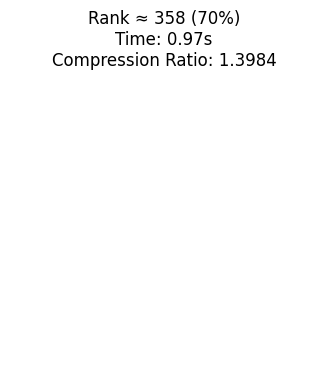

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 435
This is the random matrix generated for W
(512, 435)


This is the random matrix generated for H
(435, 512)
1
[[101.77167184 103.0445143  106.61114268 ...  98.9953172  102.03541332
  105.30146769]
 [109.607256   108.11452007 115.48600182 ... 105.33736909 112.4993087
  117.83014425]
 [103.58479417 100.42105568 109.0122984  ...  99.94554451 104.02854051
  107.52206474]
 ...
 [103.60647169 102.17968882 112.29485879 ...  99.24244862 107.13748464
  113.29003632]
 [105.16604517 102.40792418 111.8082268  ... 103.20442628 105.47632248
  112.9551723 ]
 [106.20412408 104.69189783 113.88307556 ...  99.79584567 107.44942055
  113.14708979]]
[[26915.99945833 27362.24123536 27320.41744775 ... 28063.07447084
  26595.59433501 28325.64774611]
 [28453.29404393 28914.8043191  28878.66540528 ... 29693.30501459
  28086.04925526 29933.45279873]
 [26544.4178354  26963.88295948 26957.84979917 ... 27755.73240632
  26207.06089335 2794

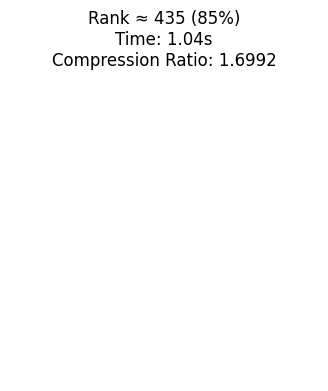

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 460
This is the random matrix generated for W
(512, 460)


This is the random matrix generated for H
(460, 512)
1
[[111.02498634 118.62026483 116.25472152 ... 111.35247553 115.13221547
  117.25987149]
 [108.95281274 116.42294628 115.89693613 ... 110.24475785 110.88395369
  114.67134828]
 [110.90310148 115.53161716 119.28569026 ... 110.13979478 115.0468275
  117.91876344]
 ...
 [108.89761827 117.12350832 116.93037473 ... 110.40757418 110.63077488
  115.27328484]
 [112.36970555 118.82516168 115.39840675 ... 109.56369839 113.38242692
  113.40290139]
 [110.64720826 114.24974694 113.99229371 ... 110.64979132 112.78726033
  114.92094645]]
[[30091.64248237 30659.99723131 28420.66217377 ... 30462.13363277
  29804.82064079 30471.32517222]
 [29211.36263514 29755.38436633 27594.80412126 ... 29589.60370218
  28890.2855783  29570.55379325]
 [30093.13366628 30623.81208861 28393.79255566 ... 30479.51368913
  29790.85064394 3046

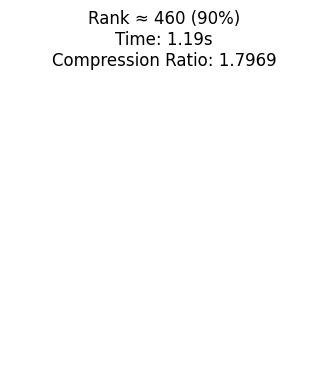

512 512
Initializing Gradient Descent NMF with V shape: (512, 512), rank: 512
This is the random matrix generated for W
(512, 512)


This is the random matrix generated for H
(512, 512)
1
[[128.5526748  127.17828536 132.51161713 ... 121.59886903 128.3925294
  125.41532685]
 [129.92914831 128.16516138 128.98823899 ... 123.72036111 125.84506126
  121.41116179]
 [129.43640311 130.54974121 132.99920513 ... 123.71668087 128.47597651
  123.10712801]
 ...
 [131.97703304 127.0936522  135.40757309 ... 125.15360479 130.77346885
  128.3059947 ]
 [120.59602781 118.44208675 120.20474665 ... 114.20556886 117.54527243
  115.49252533]
 [133.62536465 133.85141135 131.73566998 ... 128.66472678 132.61724733
  129.78514972]]
[[31591.23909409 33450.50573284 30986.64869041 ... 31989.82875591
  32788.89102837 32416.98302532]
 [31481.81192519 33370.55259221 30888.50928782 ... 31909.49155602
  32704.78239121 32332.75731443]
 [31575.0901204  33513.8029305  30969.75179365 ... 31983.77692644
  32818.77318474 3245

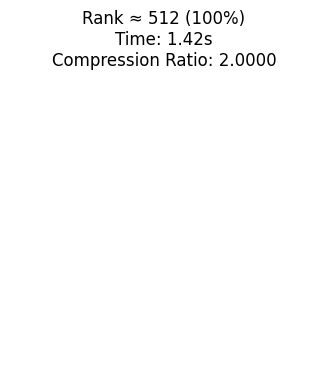

In [12]:
from nnmf import gradient_descent
import numpy as np
import cv2 
import time 
import matplotlib.pyplot as plt 
gray_image=cv2.imread('gray_mandrill.jpg', cv2.IMREAD_GRAYSCALE)
gray_image=gray_image/255
full_rank = np.linalg.matrix_rank(gray_image)
percentages = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.85, 0.90, 1]
print(gray_image.shape)
m, n = gray_image.shape
print(gray_image)

print("This is the full rank:", full_rank)


for perc in percentages:
    rank = max(1, int(perc * full_rank))  # Always at least rank 1
    start_time = time.time()
    W, H = gradient_descent(gray_image, rank, max_iter=100)
    end_time = time.time()
    comp_time = end_time - start_time

    compression_ratio = (rank * (m + n)) / (m * n)

    plt.figure(figsize=(4, 4))
    plt.title(f'Rank ≈ {rank} ({int(perc*100)}%)\nTime: {comp_time:.2f}s\nCompression Ratio: {compression_ratio:.4f}')
    plt.imshow(W @ H, cmap='gray')
    plt.axis('off')
    plt.show()



In [ ]:
percentages = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.85, 0.90, 1]

512 512
[0] Reconstruction error: 182.108088
[100] Reconstruction error: 175.522676
[200] Reconstruction error: 175.298557
[300] Reconstruction error: 175.273557
[400] Reconstruction error: 175.267435
[500] Reconstruction error: 175.265105
[600] Reconstruction error: 175.263919
[700] Reconstruction error: 175.263173
[800] Reconstruction error: 175.262660
[900] Reconstruction error: 175.262272


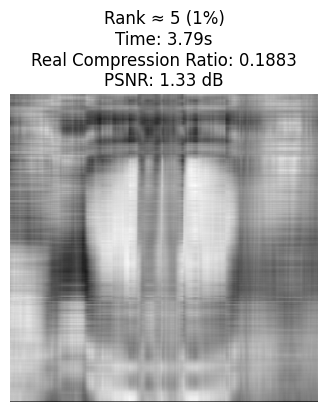

[0] Reconstruction error: 253.548660
[100] Reconstruction error: 252.553068
[200] Reconstruction error: 252.434326
[300] Reconstruction error: 252.401237
[400] Reconstruction error: 252.388138
[500] Reconstruction error: 252.381330
[600] Reconstruction error: 252.377148
[700] Reconstruction error: 252.374253
[800] Reconstruction error: 252.372098
[900] Reconstruction error: 252.370416


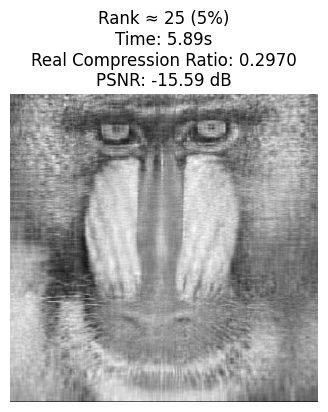

[0] Reconstruction error: 263.672931
[100] Reconstruction error: 263.151740
[200] Reconstruction error: 263.079470
[300] Reconstruction error: 263.057512
[400] Reconstruction error: 263.048204
[500] Reconstruction error: 263.043181
[600] Reconstruction error: 263.040065
[700] Reconstruction error: 263.037939
[800] Reconstruction error: 263.036383
[900] Reconstruction error: 263.035178


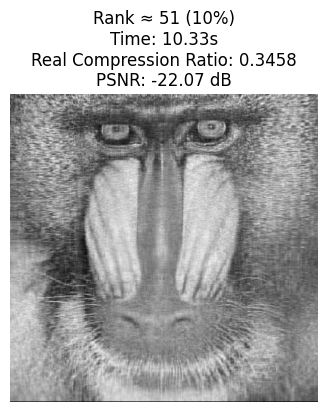

[0] Reconstruction error: 268.688144
[100] Reconstruction error: 268.406474
[200] Reconstruction error: 268.363083
[300] Reconstruction error: 268.348874
[400] Reconstruction error: 268.342475
[500] Reconstruction error: 268.338945
[600] Reconstruction error: 268.336719
[700] Reconstruction error: 268.335173
[800] Reconstruction error: 268.334029
[900] Reconstruction error: 268.333137


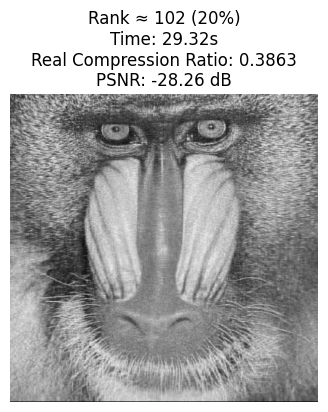

[0] Reconstruction error: 270.385086
[100] Reconstruction error: 270.189041
[200] Reconstruction error: 270.157286
[300] Reconstruction error: 270.147380
[400] Reconstruction error: 270.142794
[500] Reconstruction error: 270.140196
[600] Reconstruction error: 270.138523
[700] Reconstruction error: 270.137350
[800] Reconstruction error: 270.136475
[900] Reconstruction error: 270.135794


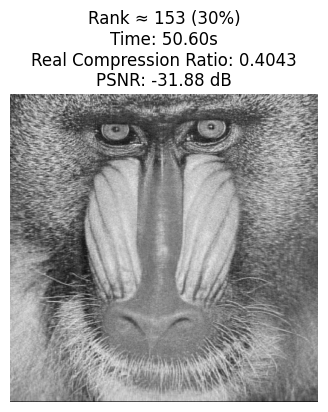

[0] Reconstruction error: 271.743247
[100] Reconstruction error: 271.618793
[200] Reconstruction error: 271.598669
[300] Reconstruction error: 271.592711
[400] Reconstruction error: 271.590025
[500] Reconstruction error: 271.588502
[600] Reconstruction error: 271.587519
[700] Reconstruction error: 271.586828
[800] Reconstruction error: 271.586314
[900] Reconstruction error: 271.585914


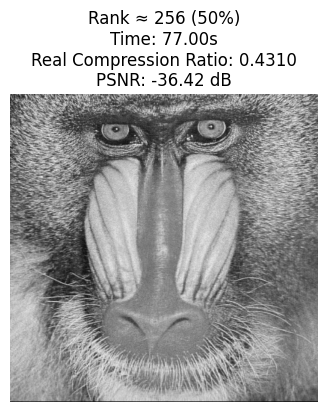

[0] Reconstruction error: 272.317464
[100] Reconstruction error: 272.225446
[200] Reconstruction error: 272.210690
[300] Reconstruction error: 272.206673
[400] Reconstruction error: 272.204881
[500] Reconstruction error: 272.203865
[600] Reconstruction error: 272.203207
[700] Reconstruction error: 272.202744
[800] Reconstruction error: 272.202398
[900] Reconstruction error: 272.202130


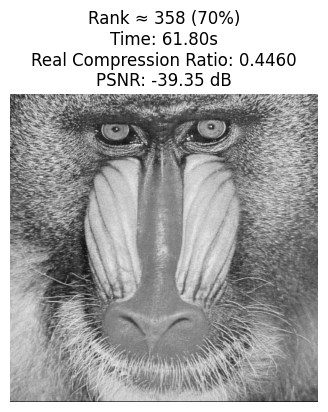

[0] Reconstruction error: 272.572752
[100] Reconstruction error: 272.495358
[200] Reconstruction error: 272.483216
[300] Reconstruction error: 272.480085
[400] Reconstruction error: 272.478723
[500] Reconstruction error: 272.477963
[600] Reconstruction error: 272.477475
[700] Reconstruction error: 272.477134
[800] Reconstruction error: 272.476882
[900] Reconstruction error: 272.476687


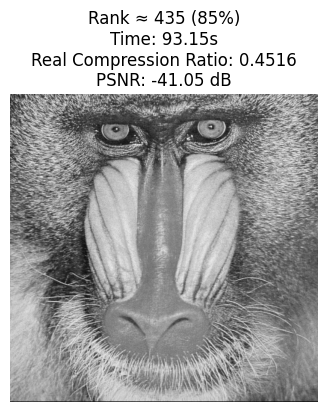

[0] Reconstruction error: 272.637900
[100] Reconstruction error: 272.564415
[200] Reconstruction error: 272.552880
[300] Reconstruction error: 272.549948
[400] Reconstruction error: 272.548683
[500] Reconstruction error: 272.547981
[600] Reconstruction error: 272.547534
[700] Reconstruction error: 272.547223
[800] Reconstruction error: 272.546993
[900] Reconstruction error: 272.546816


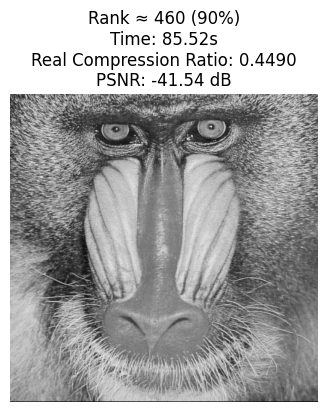

[0] Reconstruction error: 272.751778
[100] Reconstruction error: 272.684881
[200] Reconstruction error: 272.674772
[300] Reconstruction error: 272.672264
[400] Reconstruction error: 272.671183
[500] Reconstruction error: 272.670584
[600] Reconstruction error: 272.670205
[700] Reconstruction error: 272.669943
[800] Reconstruction error: 272.669751
[900] Reconstruction error: 272.669604


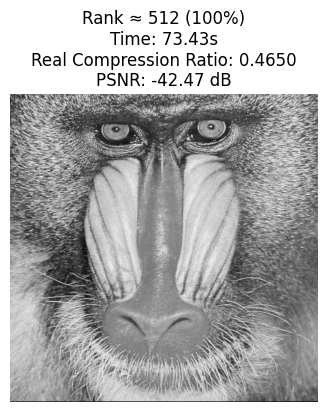

In [51]:
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

os.makedirs('compressed_results', exist_ok=True)
original_image_path = 'gray_mandrill.jpg'
original_file_size = os.path.getsize(original_image_path)
full_rank = np.linalg.matrix_rank(gray_image)
percentages = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.85, 0.90, 1]
m, n = gray_image.shape
print(m, n)

for idx, perc in enumerate(percentages):
    rank = max(1, int(perc * full_rank))
    start_time = time.time()
    W, H = multiplicative_update(gray_image, rank, max_iter=1000)
    end_time = time.time()
    comp_time = end_time - start_time

    compressed_img = W @ H

    compressed_image_path = f'compressed_results/compressed_rank_{rank}.jpg'
    plt.imsave(compressed_image_path, compressed_img, cmap='gray')

    compressed_file_size = os.path.getsize(compressed_image_path)
    real_compression_ratio = compressed_file_size / original_file_size

    mse = np.linalg.norm(gray_image - compressed_img, 'fro')**2 / (m * n)
    psnr = 10 * np.log10(1.0 / mse)

    plt.figure(figsize=(4, 4))
    plt.title(
        f'Rank ≈ {rank} ({int(perc*100)}%)\n'
        f'Time: {comp_time:.2f}s\n'
        f'Real Compression Ratio: {real_compression_ratio:.4f}\n'
        f'PSNR: {psnr:.2f} dB'
    )
    plt.imshow(compressed_img, cmap='gray')
    plt.axis('off')
    plt.show()


512 512


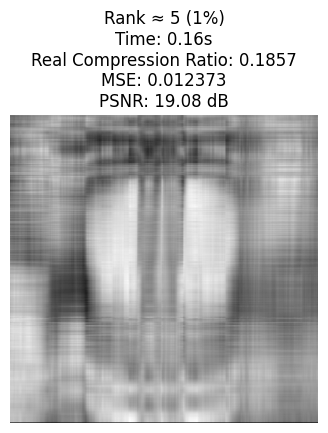

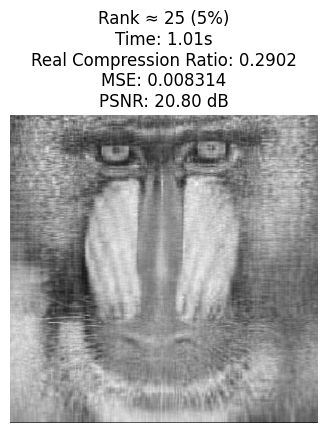

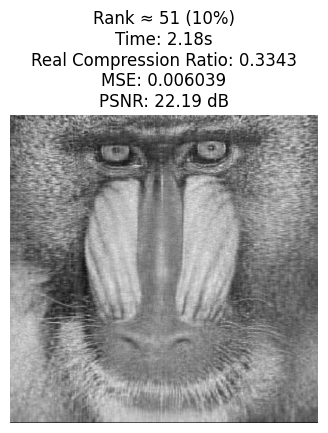

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


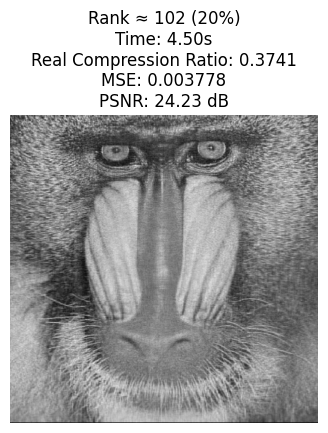

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


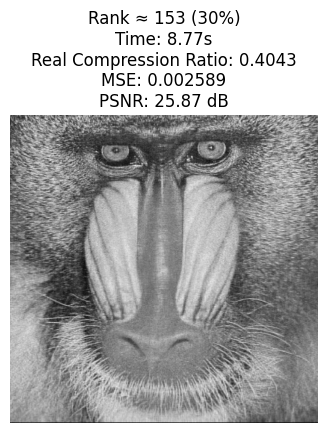

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


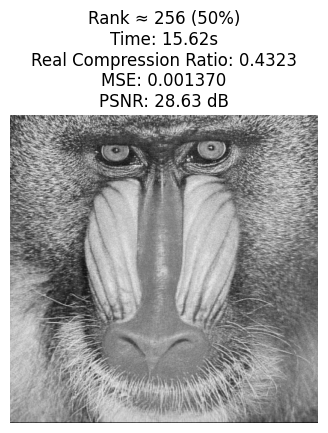

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


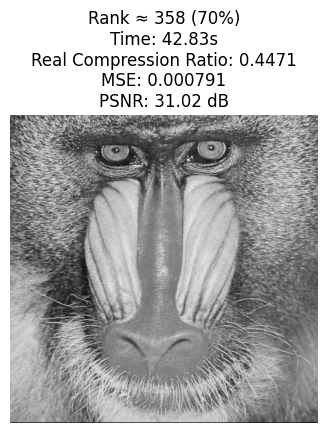

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


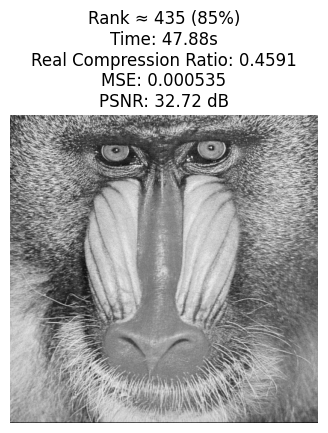

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


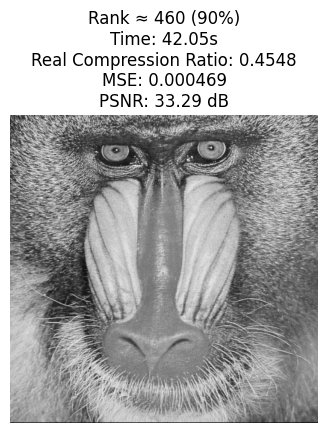

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


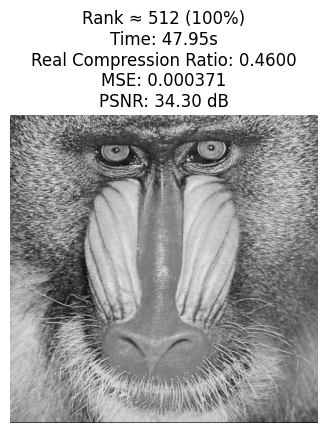

In [53]:
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

os.makedirs('compressed_results', exist_ok=True)
original_image_path = 'gray_mandrill.jpg'
original_file_size = os.path.getsize(original_image_path)
gray_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE) / 255.0
full_rank = np.linalg.matrix_rank(gray_image)
percentages = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.85, 0.90, 1]
m, n = gray_image.shape
print(m, n)

for idx, perc in enumerate(percentages):
    rank = max(1, int(perc * full_rank))
    start_time = time.time()
    
    model = NMF(n_components=rank, init='random', solver='mu', max_iter=1000, random_state=42)
    W = model.fit_transform(gray_image)
    H = model.components_
    
    end_time = time.time()
    comp_time = end_time - start_time

    compressed_img = W @ H

    compressed_image_path = f'compressed_results/compressed_rank_{rank}.jpg'
    plt.imsave(compressed_image_path, compressed_img, cmap='gray')

    compressed_file_size = os.path.getsize(compressed_image_path)
    real_compression_ratio = compressed_file_size / original_file_size

    mse = np.linalg.norm(gray_image - compressed_img, 'fro')**2 / (m * n)
    psnr = 10 * np.log10(1.0 / mse)

    plt.figure(figsize=(4, 4))
    plt.title(
        f'Rank ≈ {rank} ({int(perc*100)}%)\n'
        f'Time: {comp_time:.2f}s\n'
        f'Real Compression Ratio: {real_compression_ratio:.4f}\n'
        f'MSE: {mse:.6f}\n'
        f'PSNR: {psnr:.2f} dB'
    )
    plt.imshow(compressed_img, cmap='gray')
    plt.axis('off')
    plt.show()


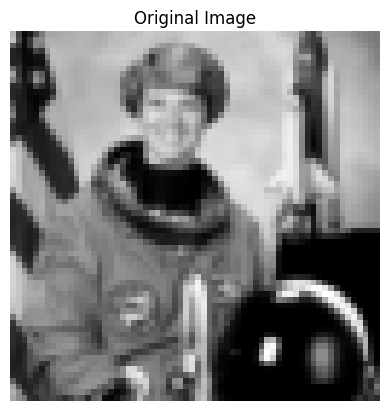

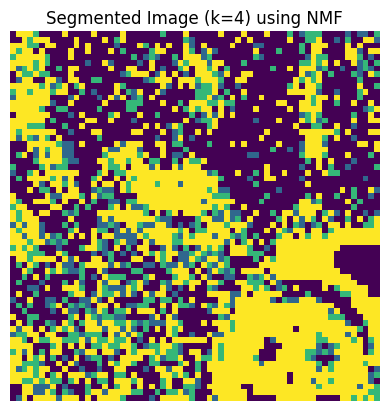

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import data, color
from skimage.transform import resize

# Load and preprocess image
image = color.rgb2gray(data.astronaut())  # convert to grayscale
image = resize(image, (64, 64), anti_aliasing=True)  # reduce size for speed
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Reshape image to 2D matrix (pixels as samples)
X = image.reshape(-1, 1)  # shape (pixels, 1 channel)

# NMF decomposition
n_components = 4  # number of segments/clusters
model = NMF(n_components=n_components, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

# Assign each pixel to a component (segment)
labels = np.argmax(W, axis=1)
segmented_image = labels.reshape(image.shape)

# Plot segmented result
plt.imshow(segmented_image, cmap='viridis')
plt.title(f"Segmented Image (k={n_components}) using NMF")
plt.axis('off')
plt.show()


In [40]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


Extracted Trouser images shape: (6000, 28, 28)


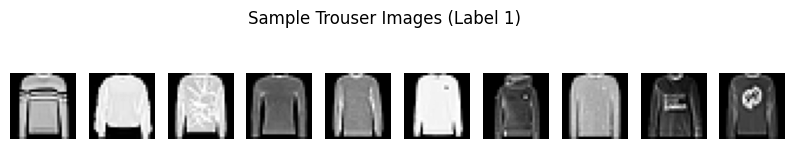

In [63]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)
trouser_indices = np.where(y_all == 2)[0]
X_trousers = X_all[trouser_indices]

X_trousers = X_trousers[:6000]

print("Extracted Trouser images shape:", X_trousers.shape)
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_trousers[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Trouser Images (Label 1)")
plt.show()

W shape: (784, 12)
H shape: (12, 6000)


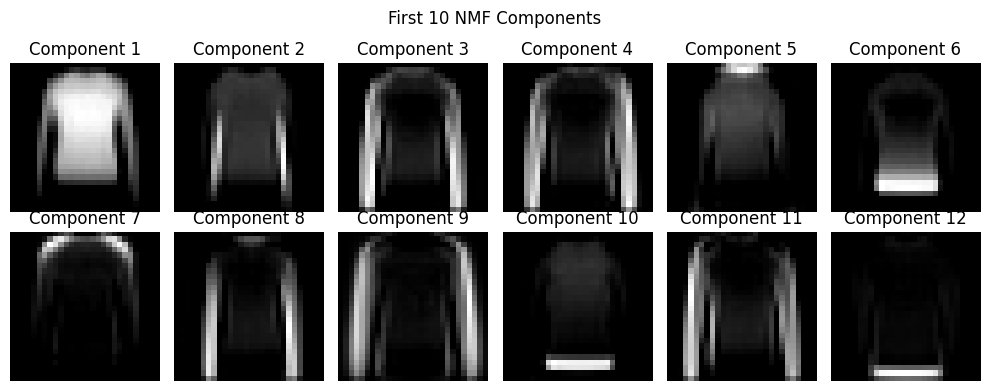

In [73]:
A = X_trousers.reshape(6000, 28*28).T.astype(np.float32) / 255.0 
nmf_model = NMF(n_components=12, init='random', random_state=0, max_iter=970)
W = nmf_model.fit_transform(A)  
H = nmf_model.components_ 
print("W shape:", W.shape)
print("H shape:", H.shape)
plt.figure(figsize=(10, 4))
for i in range(12):
    component_image = W[:, i].reshape(28, 28)
    plt.subplot(2, 6, i + 1)
    plt.imshow(component_image, cmap='gray')
    plt.title(f"Component {i+1}")
    plt.axis('off')
plt.suptitle("First 10 NMF Components")
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


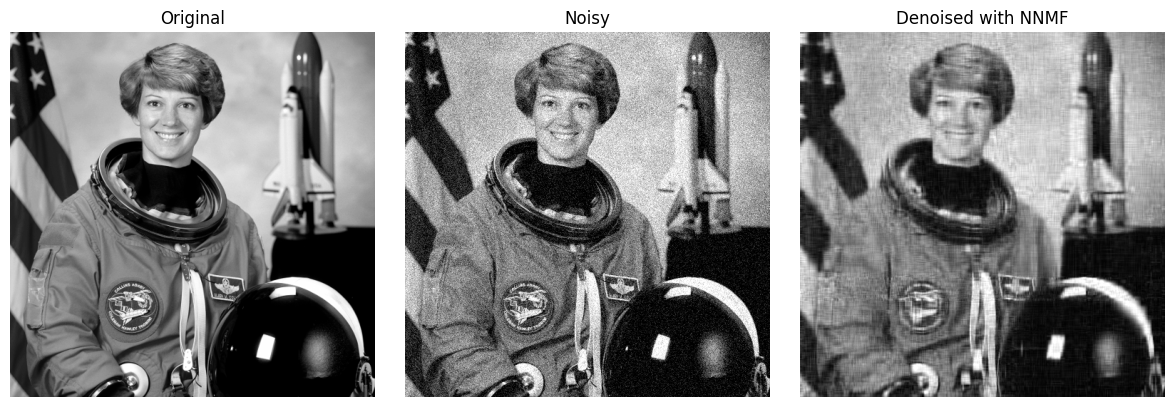

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import data, color, img_as_float
from skimage.util import random_noise

# Load and preprocess image
image = color.rgb2gray(img_as_float(data.astronaut()))
noisy = random_noise(image, mode='gaussian', var=0.01)

# Flatten image for NMF
m, n = noisy.shape
noisy_flat = noisy.reshape((m, n))

# Apply NNMF
r = 50 # rank
model = NMF(n_components=r, init='random', random_state=42, max_iter=500)
W = model.fit_transform(noisy_flat)
H = model.components_
denoised_flat = np.dot(W, H)

# Post-process
denoised = np.clip(denoised_flat, 0, 1)

# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy")
plt.imshow(noisy, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Denoised with NNMF")
plt.imshow(denoised, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
